In [11]:
# Magic + imports likely common across all notebooks
%load_ext autoreload
%autoreload 2
%matplotlib inline

CMAP = "Blues"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
sys.path.append('/home/jovyan/odc-hub/')
import warnings
warnings.filterwarnings('ignore')
import xarray as xr 
import functools as fct
from pathlib import Path

# Water Product Interoperability  

Exploiting multi-modal approaches for generating satellite-derived products can offer spatial-temporal advantages of improved completeness, accuracy and precision.

### Current Water products  

Interoperability is explored across three derived water products from `Sentinel 1`, `Sentinel 2` and `Landsat 8`. The classification and initial data-exploration is conducted in separate notebooks listed below: 

   - `Sentinel 1`- [link]()    
   A thresholding algorthim takes advantage of linear class separability on vv and vh bands to classify water.  
     
     
   - `Landsat 8`- [link]()    
   The Water Observations From Space(WOFS) algorithm is applied to Landsat8 imagery. WOFS uses a decision tree on surface reflectance features.    
   
   
   - `Sentinel 2`- [link]()    
   The Water Observations From Space(WOFS) algorithm is applied to Sentinel 2 imagery. While the original WOFS algorithm was trained and calibrated on Landsat 7 imagery, relatively consistent results are expected from a re-application on Sentinel 2 imagery and are tolerated for the purpose of exploring interoperability.     
   
The outputs of these notebooks are temporarily saved into corressponding `netcdf` files. To properly run this notebook. Ensure that the notebooks listed above have been run.  


### Loading Water Products  

The following code lists the paths for three water products and loads them into the notebook.  

In [13]:
# Define dataset file paths
DATA_DIR = Path('/home/shared/geo_demos/wofs_testers')

DATASETS = {
    'l8': DATA_DIR / 'l8_wofs_product_30.nc',
    's1': DATA_DIR / 's1_wofs_product_30.nc',
    's2': DATA_DIR / 's2_wofs_product_30.nc'
}

In [14]:
# Load datasets
datasets = {name: xr.open_dataset(path) for name, path in DATASETS.items()}
#print('Loaded datasets: {}'.format(', '.join(datasets.keys())))

In [15]:
merged = fct.reduce(lambda ds_a, ds_b: ds_a.merge(ds_b), datasets.values())

## Fiji's Coastline

This notebook considers Fiji's water resource. Fiji's coastlines along with other Southern Pacific Islands are at risk from rising sea levels.

Being able to determine the location and permamency of coastal water and inland water bodies is of high priority to decision makers.

This notebook demonstrates the way in which a datacube can be used to bring together datasets from a variety of satellites data sources to provide information on water location to decision makers. 


## move me

Each xarray contains a variable called `wofs` that houses water classifications from the classifiers. Values in these xarray assume one of three values. `1`,`0` for water and not-water as well as `nan` values for areas occluded by cloud or are missing data.  

# Example Site
## Southern Fiji - change is we change AOI!!

In [16]:
latitudes = (-18.038177490235, -18.220825195313) 
longitudes = (178.24905395508, 178.51547241212)
#178.12 -18.25,178.15 -18.25,178.15 -18.27,178.12 -18.27,178.12 -18.25
#aoi_wkt = "POLYGON((178.24905395508 -18.036804199219, 178.51547241212 -18.038177490235, 178.51547241212 -18.220825195313, 178.25454711915 -18.220825195313, 178.24905395508 -18.036804199219))"
#aoi = gpd.GeoDataFrame(pd.DataFrame({'geoms':[wkt.loads(aoi_wkt)]}), geometry='geoms')

In [17]:
from utils_sac.interactive_maps import display_map
from utils_sac.notebook_animation_widgets import create_movie_on_np_array
from utils_sac.plotting import plot_availability
display_map(latitude = latitudes, longitude = longitudes)

### An annual extent derived from merged products

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Annual Summary Products  

Something about annual summary products. 

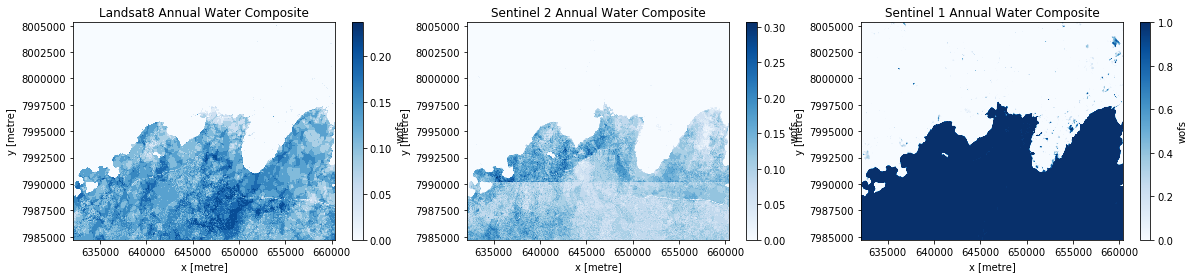

In [19]:
fig, axes = plt.subplots(1,3, figsize = (20,4))

a = datasets["l8"].mean(dim = "time", skipna = True).wofs
b = datasets["s2"].mean(dim = "time", skipna = True).wofs
c = datasets["s1"].mean(dim = "time", skipna = True).wofs

a.plot(ax=axes[0], cmap = CMAP)
axes[0].set_title("Landsat8 Annual Water Composite")

b.plot(ax=axes[1], cmap = CMAP)
axes[1].set_title("Sentinel 2 Annual Water Composite")

c.plot(ax=axes[2], cmap = CMAP)
axes[2].set_title("Sentinel 1 Annual Water Composite")

plt.show()

# The Sensors

# Sentinel 2  

Sentinel 2 is an optical sensor, data is missing due to the presence of clouds.  

In [37]:
create_movie_on_np_array(np.flip(datasets["s2"].wofs.values, axis = [1]), text = [*map(str, datasets["s2"].wofs.time.values)], cmap = "Blues")

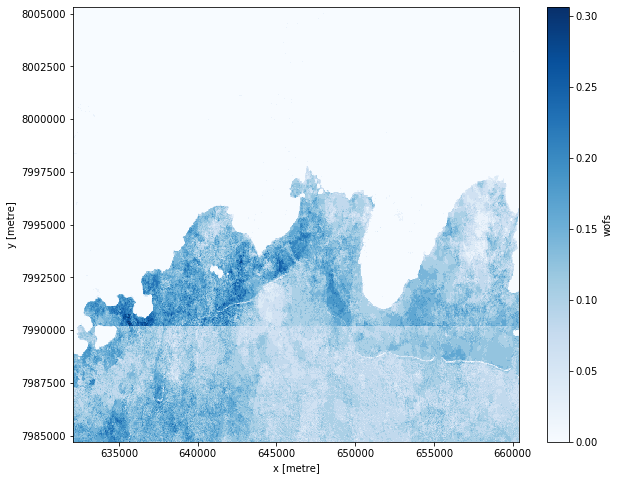

In [21]:
plt.figure(figsize = (10,8))
datasets["s2"].mean(dim = "time", skipna = True).wofs.plot(cmap = "Blues")

In [22]:
monthly_s2 = datasets["s2"].resample(time = "M").mean(skipna = True)

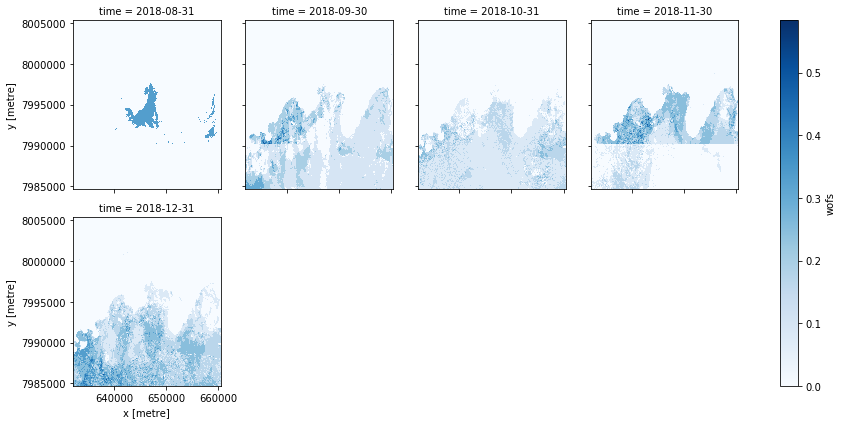

In [23]:
monthly_s2.wofs.plot(col='time',col_wrap=4, cmap = "Blues")

# Landsat 8

Is also an optical sensor, again the completeness of the data is impacted by the presence of clouds.

Text(0.5, 1.0, 'hello')

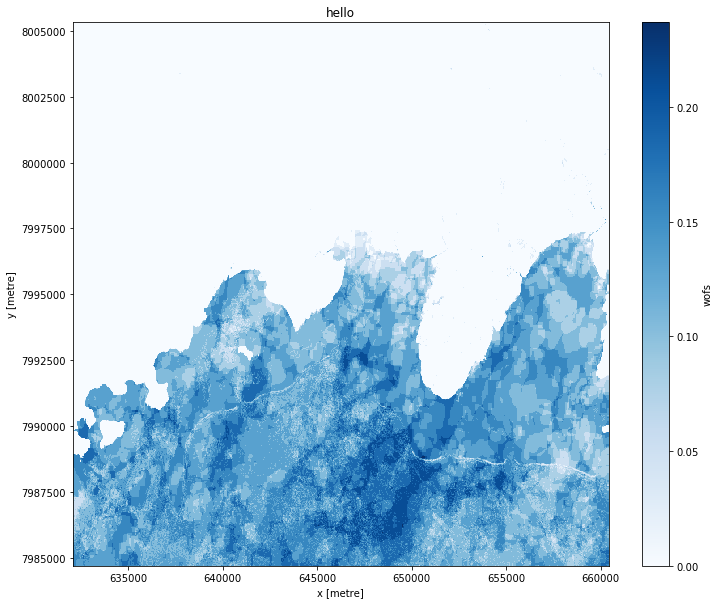

In [39]:
#create_movie_on_np_array(np.flip(datasets["l8"].wofs.values,axis = [1]), text = [*map(str, datasets["l8"].wofs.time.values)], cmap = "Blues")
plt.figure(figsize = (12,10))
datasets["l8"].mean(dim = "time", skipna = True).wofs.plot(cmap = "Blues")

In [25]:
monthly_l8 = datasets["l8"].resample(time = "M").mean(skipna = True)

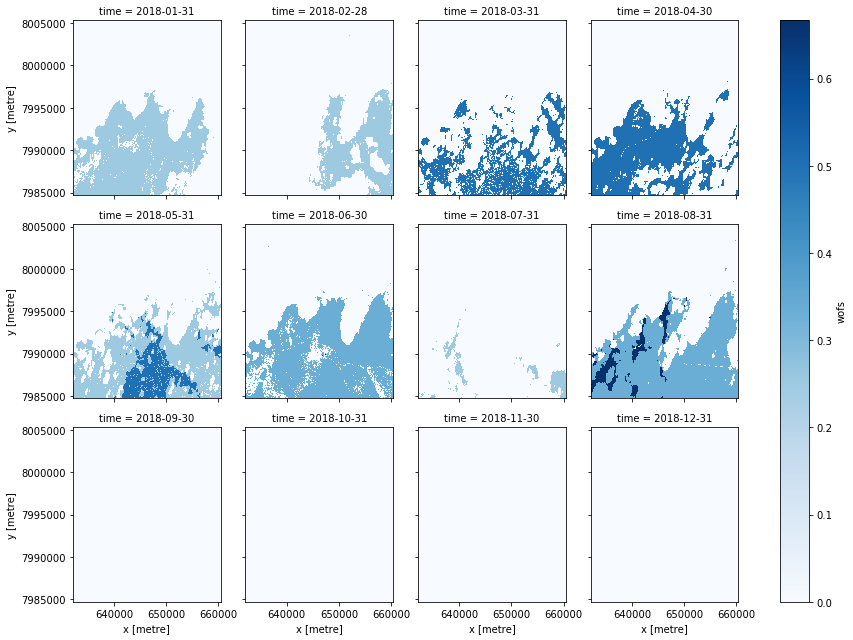

In [26]:
monthly_l8.wofs.plot(col='time',col_wrap=4, cmap = "Blues")

# Sentinel 1

Sentinel 1 is is a Synthetic Aperture Radar sensor, it's data collection is not impacted by the presence of cloud. This provides data a regular measure of water presence. Although the sensor is affected by other forms of 'noise'. 

In [40]:
create_movie_on_np_array(np.flip(datasets["s1"].wofs.values, axis = [1, 2]), text = [*map(str, datasets["s1"].wofs.time.values)], cmap = "Blues")

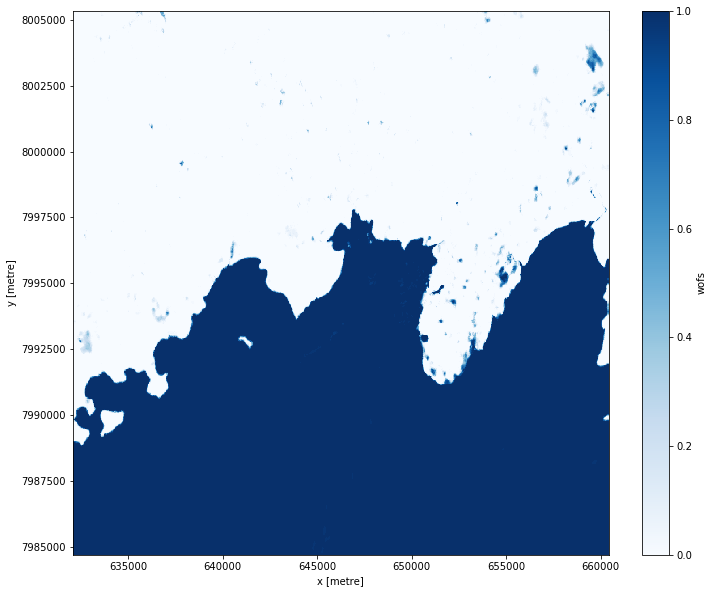

In [41]:
plt.figure(figsize = (12,10))
datasets["s1"].mean(dim = "time", skipna = True).wofs.plot(cmap = "Blues")

In [42]:
monthly_s1 = datasets["s1"].resample(time = "M").mean(skipna = True)

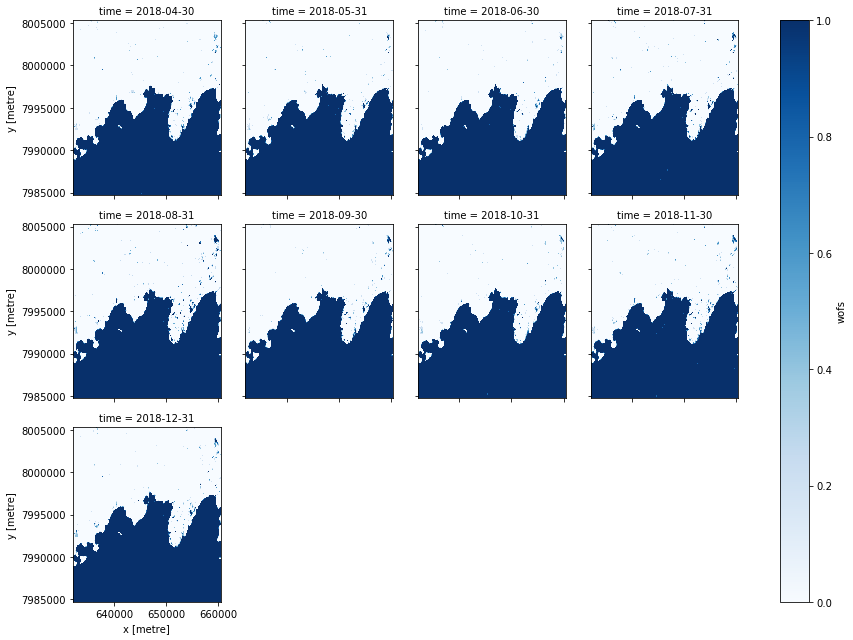

In [43]:
monthly_s1.wofs.plot(col='time',col_wrap=4, cmap = "Blues")

# Merged Time Series

Integrating these three datasets together, can provide for a more robust and regular water product. 

In [31]:
from functools import reduce 
#create_movie_on_np_array(np.flip(merged.wofs.values, axis = [1]), cmap = "Blues")

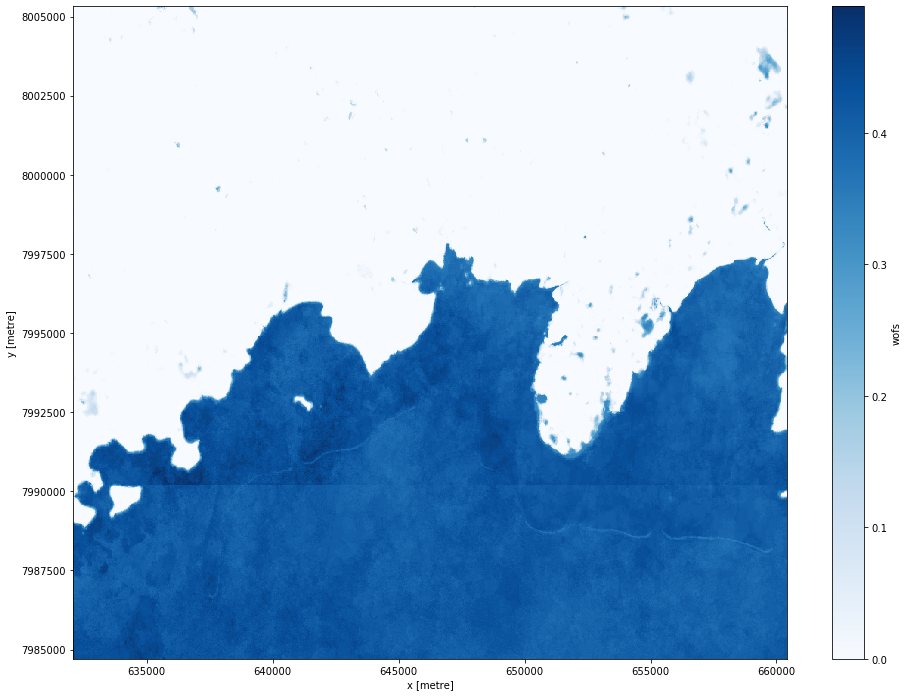

In [32]:
plt.figure(figsize = (16,12))
merged.mean(dim = "time", skipna = True).wofs.plot(cmap = "Blues")

## Interoperability


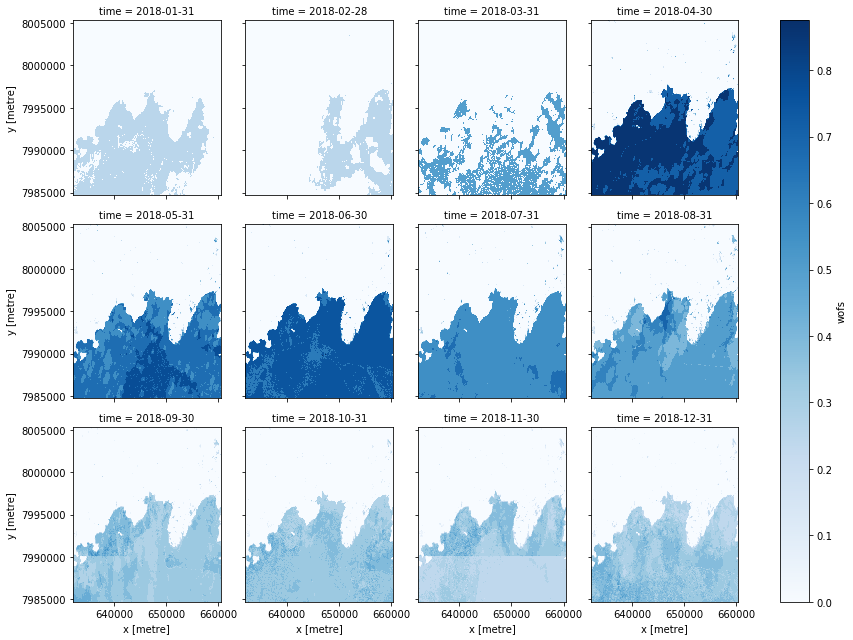

In [44]:
fused_resample =merged.resample(time = "M").mean(skipna = True)
fused_resample.wofs.plot(col='time',col_wrap=4, cmap = "Blues")

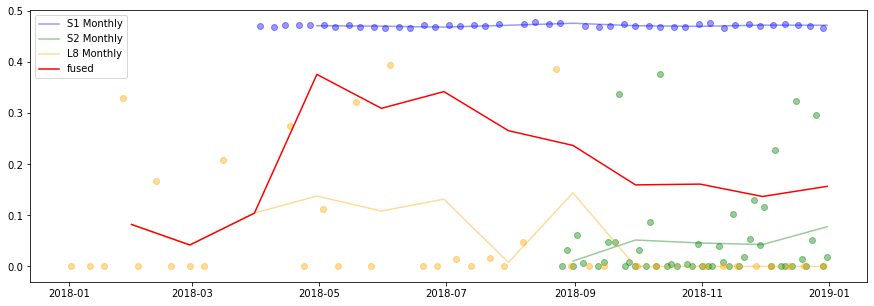

In [45]:
import matplotlib.pyplot as plt  

plt.figure(figsize = (15,5))
plt.plot(monthly_s1.time.values,  monthly_s1.mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "blue", label = "S1 Monthly")
plt.scatter(datasets["s1"].time.values,  datasets["s1"].mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "blue")

plt.plot(monthly_s2.time.values,  monthly_s2.mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "green", label = "S2 Monthly")
plt.scatter(datasets["s2"].time.values,  datasets["s2"].mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "green")

plt.plot(monthly_l8.time.values,  monthly_l8.mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "orange", label = "L8 Monthly")
plt.scatter(datasets["l8"].time.values,  datasets["l8"].mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "orange")


plt.plot(fused_resample.time.values,  fused_resample.mean(dim = ["x", "y"], skipna = True).wofs.values, color = "red", label = "fused")

plt.legend()